Okay, after a lot of talk around a highly abstract-ive agentic framework, let's talk about Deepseek!

We will go into the depth of Deepseek's approach. We will learn how a relatively unknown company with limited resources was able to challenge behemoths such as Google, Open AI and Anthropic.

**DeepSeek AI**: This is the name of the company. They are an AI research company focused on developing powerful artificial intelligence, particularly in the area of language. They release models with the same names - DeepSeek V3, DeepSeek-Coder, DeepSeek-R1, etc.

# First, let's talk about Reinforcement Learning

Simply put, Reinforcement learning is a type of machine learning where a "model" learns to make decisions by taking actions in an environment to maximize a reward. Think of it as training a dog — the dog learns to perform a trick to get a treat.

The "model" receives positive or negative feedback based on its actions and gradually learns how to complete a task. In other words, RL is about learning the optimal behavior in an environment to obtain maximum reward.

The "model" - since it takes actions can be called an agent. This is where Agentic AI takes its name from.

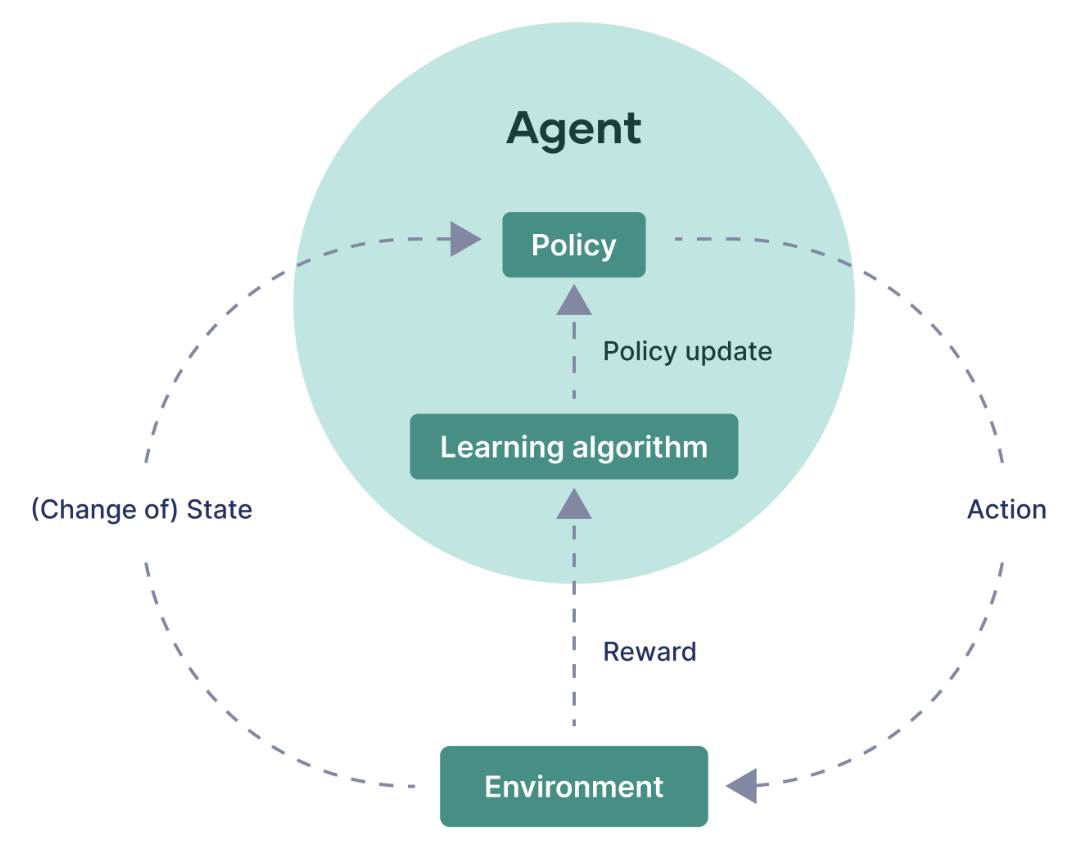

*Source: Scribbr*

* **Agent:** This is the entity that interacts with the environment and learns to make decisions.
* **Policy:** Within the agent, the policy is a strategy that the agent uses to determine its next action based on the current state of the environment.
* **Learning Algorithm:** Also within the agent, the learning algorithm is responsible for updating the policy based on the feedback received from the environment (rewards and state changes).
* **Environment:** This is the external system with which the agent interacts. It provides feedback to the agent based on the agent's actions.
* **Action:** The agent performs an action based on its current policy and state. This action is applied to the environment.
* **Reward:** After the agent performs an action, the environment provides a reward signal to the agent. This reward indicates how good or bad the action was.
* **Change of State:** The environment also transitions to a new state as a result of the agent's action. This new state is communicated back to the agent.
* **Interaction Cycle:** The diagram illustrates a continuous loop where the agent takes an action, the environment responds with a reward and a new state, and the agent uses this information to update its learning algorithm and subsequently its policy, influencing future actions.

## Reinforcement Learning via Example
Suppose we want to train a computer to play Pac-Man. Here are the key elements of reinforcement learning within this specific context:
- Environment is everything that constitutes the game’s world: the maze, the enemy (ghosts), the dots, the bonus items (fruits), the power pellets, etc.
- Agent refers to the eponymous character. The agent’s goal is to “eat” all the dots in the maze, avoid the ghosts, and maximize its score.
- Action refers to moves Pac-Man can make: moving up, down, right, or left.
- States can be different situations or scenarios, such as being in a corner of the maze with no dots nearby and several ghosts approaching. The positions of Pac-Man and the ghosts, the remaining dots, and whether ghosts are in blue mode (so that Pac-Man can chase them) all constitute states.
- Reward can be positive—e.g., receiving points for eating dots—or negative—e.g., losing a “life” if caught by a ghost.
- Policy can be a rule like “if a ghost is nearby, move in the opposite direction” or “if a dot is nearby, move towards it.”

- Each state has a value:
  - Value can be understood as the desirability of being in a particular state. The value of the state described above, where Pac-Man is cornered by the ghosts, would be low because Pac-Man is at risk of being caught and has little opportunity to increase the score by eating dots.
  - A state where Pac-Man eats a power pellet and can chase the ghosts would have high value because it allows Pac-Man to collect many dots, eliminate the ghosts, and increase the score.

# How are LLM Models trained?

Training an LLM is a multi-stage process.

* **Stage 1: Pre-training**
    * **Goal:** Learn general language understanding and knowledge.
    * **How:** The model is fed enormous amounts of text data (like Wikipedia, books, websites). It learns to predict the next word in a sentence, fill in missing words, or understand relationships between words. This builds its foundational knowledge and language capabilities.
    * **Result:** A base model that understands language but might not be great at following specific instructions or behaving helpfully/safely.

* **Stage 2: Supervised Fine-Tuning (SFT)**
    * **Goal:** Teach the model to follow instructions and respond in a helpful format (like a chatbot).
    * **How:** The model is trained on a smaller, high-quality dataset of prompt-response pairs. These pairs are often created by humans, showing the model examples of good answers to specific questions or instructions. (e.g., Prompt: "Explain gravity." Response: "Gravity is...")
    * **Result:** A model that is better at following instructions but might still generate responses that are not ideal, subtly incorrect, unsafe, or not aligned with human preferences.

* **Stage 3: Alignment / Preference Tuning (This is where techniques like GRPO come in!)**
    * **Goal:** Make the model's responses more aligned with what humans actually prefer – typically aiming for responses that are helpful, honest, and harmless.
    * **How:** This often involves Reinforcement Learning from Human Feedback (RLHF).
        * Humans are shown multiple responses generated by the SFT model for the same prompt.
        * Humans rank these responses from best to worst based on human-ease-of-reading, helpfulness, accuracy, safety, etc.
        * This preference data is used to train the LLM further. The model learns to generate responses similar to the ones humans preferred and avoid responses similar to the ones humans disliked.
    * **Result:** A model that behaves more like a helpful and safe assistant, generating higher-quality and more preferred outputs.


**Detailing the Mechanisms**

Let's look closer at *how* each stage works technically:

1.  **Pre-training Mechanics:**
    * **Architecture:** Most modern LLMs (like DeepSeek's) use the **Transformer architecture**. This architecture uses mechanisms like "self-attention" that allow the model to weigh the importance of different words in the input text when processing information, enabling it to understand long-range dependencies and context effectively.
    * **Objective Function:** The most common objective is **Next-Token Prediction**. The model is given a sequence of text and trained to predict the very next word (or token – a piece of a word). It does this billions of times across the massive dataset. By constantly predicting what comes next, it implicitly learns grammar, facts, context, and even reasoning. Another objective is **Masked Language Modeling (MLM)** where the model predicts masked-out words within a sentence.
    * **Process:** This requires immense computational power (thousands of GPUs running for weeks or months) and sophisticated distributed training techniques. The model's parameters (billions or trillions of numbers representing learned patterns) are adjusted iteratively using optimization algorithms (like Adam) to minimize the prediction error (the difference between the model's prediction and the actual next token).

2.  **Supervised Fine-Tuning (SFT) Mechanics:**
    * **Process:** The pre-trained model is taken and further trained on the instruction-response dataset. For a given prompt, the model generates a response. The training process adjusts the model's parameters to make its output response as similar as possible to the human-written "good" response provided in the dataset.
    * **Objective Function:** Typically uses a **Cross-Entropy Loss**. This measures the difference between the probability distribution the model assigns to the next token and the actual next token in the target response. The goal is to minimize this loss, effectively teaching the model to generate the desired output sequence.
    * **Result:** The model learns the *format* and *intent* of instruction-following.

3.  **Alignment / Preference Tuning Mechanics:**
    * **Need:** SFT teaches *how* to respond, but not necessarily *what* constitutes the *best* response among several possibilities. Alignment handles this value judgment.
    * **Standard RLHF:**
        * *Preference Data:* Collect pairs or rankings (Response A > Response B).
        * *Reward Model (RM) Training:* Train a separate model (often another LLM) to take a prompt and a response and output a scalar score representing how much a human would likely prefer that response. It learns this from the preference data.
        * *RL Fine-Tuning:* Use an RL algorithm like **PPO (Proximal Policy Optimization)**. The SFT-Model/LLM (the "policy") generates responses. The RM provides reward scores. The PPO algorithm updates the LLM's parameters to maximize the expected reward from the RM, encouraging it to generate responses humans prefer. A **KL divergence penalty** is often added to prevent the LLM from diverging too much from the original SFT model, maintaining its core language capabilities.
    * **Direct Preference Optimization (DPO)**
    * **GRPO**

**Some Nuance and Advanced Considerations at Each Stage**


1.  **Pre-training Nuances:**
    * **Data Quality:** The quality, diversity, and cleanliness of the pre-training data are crucial. Biases (gender, race, etc.), toxicity, and misinformation present in the data can be learned by the model, requiring significant effort in data filtering and later alignment stages to mitigate.
    * **Scaling Laws:** Research has found predictable relationships (scaling laws) between model performance, model size (number of parameters), dataset size, and the amount of computation used for training. This guides decisions on allocating resources.
    * **Architecture Variants:** While Transformers are standard, there are variations (e.g., decoder-only like GPT, encoder-decoder like T5) optimized for different nuances. DeepSeek-V3, for instance, uses a Mixture-of-Experts (MoE) architecture for efficiency.

2.  **SFT Nuances:**
    * **Data Diversity & Quality:** The quality and diversity of the SFT dataset heavily influence the model's ability to generalize to new, unseen instructions. Limited or low-quality data can lead to poor instruction-following.
    * **Catastrophic Forgetting:** Aggressively fine-tuning can sometimes cause the model to "forget" some of the general knowledge learned during pre-training. Techniques are used to balance instruction-following with knowledge retention.
    * **Parameter-Efficient Fine-Tuning (PEFT):** Techniques like LoRA (Low-Rank Adaptation) allow fine-tuning only a small subset of the model's parameters, making SFT (and sometimes alignment) much more computationally efficient, especially for very large models.

3.  **Alignment Nuances:**
    * **Preference Data Challenges:** Collecting high-quality human preference data is expensive, time-consuming, and subjective. Different human labelers may have different preferences (low inter-annotator agreement). Defining "helpfulness" or "harmlessness" can be complex.
    * **Alignment Tax:** Sometimes, making a model safer or more aligned can slightly reduce its raw capability on certain tasks (e.g., creative writing or complex reasoning), referred to as the "alignment tax." Balancing safety and capability is an ongoing research area.
    * **Iterative Process:** Training isn't strictly linear. Often, teams iterate between SFT and Alignment, or perform multiple rounds of alignment, using the improved model to generate better responses for the next round of preference data collection.
    * **Evaluation:** Evaluating LLMs is complex. Beyond automated benchmarks (like MMLU, HumanEval), human evaluation is critical, especially for assessing alignment aspects like helpfulness and harmlessness, which are hard to quantify automatically.

Each stage builds upon the previous one, progressively shaping the model's knowledge and behavior.

# Reinforcement Learning from Human Feedback (RLHF) - Deeper Dive

**Core Concept:**

RLHF is the dominant paradigm for aligning LLMs with human preferences and values (e.g., helpfulness, honesty, harmlessness), moving beyond the capabilities learned during pre-training and the instruction-following behavior instilled by Supervised Fine-Tuning (SFT). It frames the alignment problem as an RL task where the reward signal is derived from human judgments comparing model outputs.

**The Standard RLHF Pipeline:**

Most RLHF implementations follow a three-stage process:

1.  **Start with a Pre-trained/SFT Model ($\pi_{\text{SFT}}$)**: You begin with an LLM that has undergone pre-training and usually SFT. This model ($\pi_{\text{SFT}}$) serves as the initial policy for the RL phase and often as a reference point for regularization.

2.  **Collect Human Preference Data & Train a Reward Model (RM)**:
    * **Data Collection**: Sample prompts ($x$) from a relevant distribution. Generate multiple ($k \ge 2$) responses ($y_1, y_2, ..., y_k$) for each prompt using the current best policy (initially $\pi_{\text{SFT}}$). Human annotators provide preferences, most commonly as pairwise comparisons (e.g., for a pair $(y_i, y_j)$, annotator indicates which is preferred, $y_w \succ y_l$ where $w, l$ are the indices of the winning and losing responses). This creates a dataset $D = \{(x, y_w, y_l)\}$.
    * **Reward Model Training ($r_\phi$)**: Train a separate model (the Reward Model, RM), parameterized by $\phi$, to predict human preferences. The RM typically takes a prompt $x$ and a response $y$ as input and outputs a scalar score $r_\phi(x, y)$. A common practice is to initialize the RM from the SFT model checkpoint and replace the final language modeling head with a linear layer outputting a scalar. The RM is trained to assign higher scores to preferred responses using a pairwise ranking loss, often based on the Bradley-Terry model, which assumes the probability of preferring $y_w$ over $y_l$ is proportional to the difference in their rewards:
        $$P(y_w \succ y_l | x) = \sigma(r_\phi(x, y_w) - r_\phi(x, y_l))$$
        The training objective minimizes the negative log-likelihood of the observed preferences:
        $$\mathcal{L}(\phi) = -\mathbb{E}_{(x, y_w, y_l) \sim D} \left[ \log(\sigma(r_\phi(x, y_w) - r_\phi(x, y_l))) \right]$$
        where $\sigma$ is the sigmoid function. Ensuring RM calibration and accurately capturing the nuances of human preference across diverse inputs are significant challenges.

3.  **Fine-tune the LLM Policy ($\pi_\theta$) via RL**:
    * **Objective**: Optimize the parameters ($\theta$) of the LLM policy ($\pi_\theta$, initialized from $\pi_{\text{SFT}}$) to maximize the expected reward assigned by the trained RM, while simultaneously regularizing to prevent significant deviation from the initial SFT policy.
    * **RL Algorithm**: Proximal Policy Optimization (PPO) is the de facto standard. Its on-policy nature combined with mechanisms like clipping the objective function provides relative stability compared to other RL algorithms when dealing with the high dimensionality and complexity of LLM policy spaces.
    * **PPO Objective (RLHF Context)**: The policy is updated to maximize:

$$\text{Objective}(\theta) = \mathbb{E}_{x \sim D_{\text{prompt}}, y \sim \pi_\theta(y|x)} [r_\phi(x, y) - \beta D_{KL}(\pi_\theta(\cdot|x) || \pi_{\text{ref}}(\cdot|x))]$$

Let's break this down:
* $r_\phi(x, y)$: The reward signal obtained from the frozen Reward Model for a generated response $y$ given prompt $x$.
* $\pi_{\text{ref}}(\cdot|x)$: The reference policy, usually the initial SFT model ($\pi_{\text{SFT}}$).
* $D_{KL}(\pi_\theta(\cdot|x) || \pi_{\text{ref}}(\cdot|x))$: The Kullback-Leibler (KL) divergence between the current policy $\pi_\theta$ and the reference policy $\pi_{\text{ref}}$. This term acts as a per-token penalty, discouraging the policy from deviating too drastically from the reference model. This helps maintain linguistic coherence, retain knowledge from pre-training/SFT, prevent mode collapse, and mitigate reward hacking (finding exploits in the RM that don't correspond to genuine preference).
* $\beta$: The coefficient controlling the strength of the KL penalty. Tuning $\beta$ is crucial for balancing reward maximization and policy constraint.
* **Optimization**: PPO involves estimating an advantage function (often using Generalized Advantage Estimation - GAE) and optimizing the policy using multiple gradient steps on batches of experience collected under the current policy.

**Key Considerations & Challenges:**

* **Scalability & Cost:** Generating preference data is labor-intensive and expensive. Scaling this process while maintaining high quality is a major bottleneck.
* **RM Fidelity & Specification:** The RM is an imperfect proxy for true human preference. It can be miscalibrated, fail to capture complex trade-offs, or be vulnerable to adversarial examples (reward hacking). Its quality fundamentally limits RLHF performance.
* **RL Training Instability:** Optimizing LLMs with RL can be unstable and highly sensitive to hyperparameters (e.g., learning rate, $\beta$, PPO's clipping parameter $\epsilon$).
* **Alignment Tax:** Over-optimization for the preferences captured in the RM/data can sometimes lead to a degradation in performance on other capabilities or benchmarks.
* **Preference Ambiguity:** Humans may disagree, or preferences might be context-dependent, making it hard to define a single consistent reward signal.

**Evolution & Alternatives:**

The complexities and potential instabilities of the explicit RM + PPO pipeline have spurred research into alternatives:

* **Direct Preference Optimization (DPO):** Bypasses the explicit RM training step. It derives a loss function directly from the preference data that allows optimizing the policy $\pi_\theta$ such that it implicitly increases the relative probability of preferred sequences over rejected ones, effectively optimizing an implicit reward function constrained by KL divergence from the reference policy.
* **Group Relative Policy Optimization (GRPO):** As used by DeepSeek, an extension or variant focusing on optimizing preferences over groups or lists of candidates (e.g., one chosen vs. multiple rejected), potentially offering a more robust signal than purely pairwise methods like DPO.


In summary, RLHF is a powerful technique for steering LLMs towards desired behaviors defined by human preferences. It involves leveraging human feedback to train a reward model and then using reinforcement learning (typically PPO) to optimize the LLM policy against this reward, carefully balancing preference maximization with policy stability via KL regularization. While highly effective, its implementation complexity and inherent challenges continue to drive innovation towards more direct and robust alignment methods.

# So, what is GRPO?


Group Relative Policy Optimization (GRPO) is a Reinforcement Learning (RL) algorithm primarily designed to enhance the reasoning capabilities of Large Language Models (LLMs), particularly for complex tasks like mathematical problem-solving and coding. It's presented as a more computationally efficient alternative to traditional methods like Proximal Policy Optimization (PPO), which was notably used in training models like ChatGPT.

GRPO has also been described as a method for aligning LLMs robustly to the preferences of diverse user groups, ensuring fairness and minimizing performance imbalances across these groups.

### Core Concepts and How it Works

1.  **Elimination of the Value Model (Critic):**
    * Traditional RL algorithms like PPO often use a separate "value function" or "critic" model. This model estimates the expected future reward (or "value") from a given state, which helps in calculating the "advantage" (how much better an action is compared to the average).
    * GRPO *removes* the need for this separate value model. This is a key innovation that significantly reduces the memory footprint and computational cost associated with training, roughly halving the compute requirements compared to PPO.

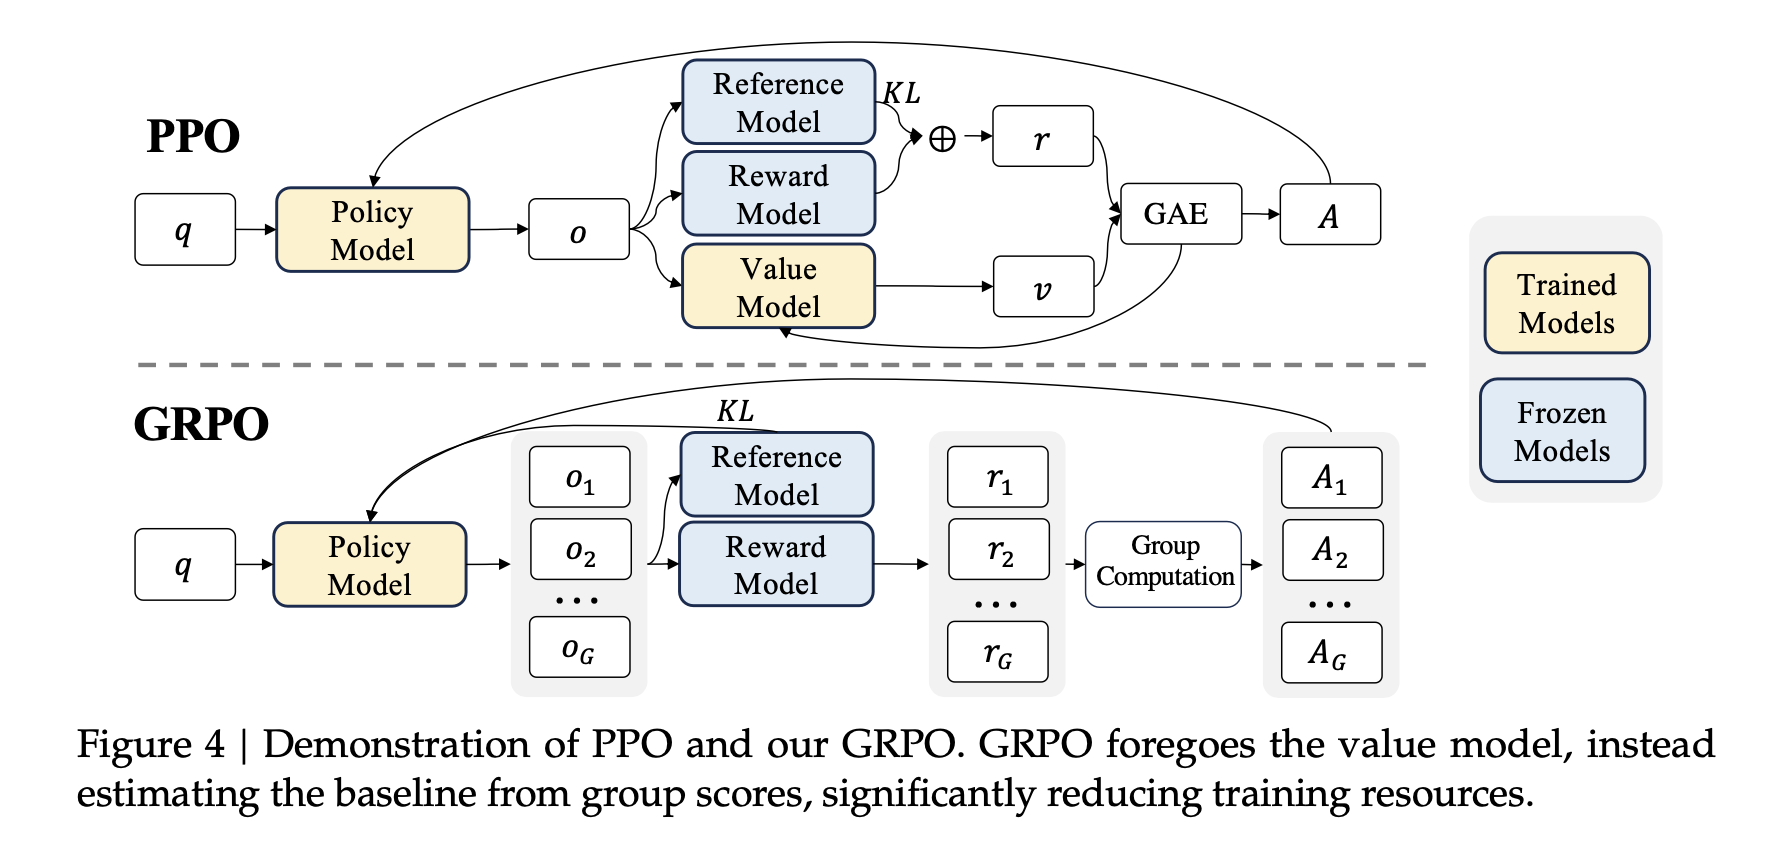

*Source: Deepseek Paper*

- Policy Model - Fancy name for the current LLM you are training
- Reference Model - A frozen version of the original LLM you are training - basically, your baseline to see your improvements (original state of your policy model).
- Reward Model - The model that was trained on human preferences - your evaluation model
- Value Model - A model that is trying to estimate the long term reward given certain actions








2.  **Group-Based Relative Advantage Calculation:**
    * Instead of relying on a value model for a baseline, GRPO generates *multiple* responses (a "group") for the same input prompt using the current policy (the LLM being trained).
    * Each response in the group is evaluated, typically using a reward model or simpler rule-based reward functions (e.g., checking for correctness via string matching, adherence to formatting rules).
    * The "advantage" for each individual response is then calculated *relative* to the performance of the entire group. A common way to do this is by normalizing the response's reward using the mean and standard deviation of all rewards within that group: `Advantage = (Reward_individual - Reward_mean) / Reward_stddev`.
    * This tells the model how much better or worse a specific response was compared to the average performance *for that specific prompt*, providing the learning signal without needing a separate value estimator.

3.  **Policy Update:**
    * Like PPO, GRPO updates the policy (the LLM's parameters) to encourage actions (generating tokens) that lead to higher advantages.
    * It often uses a similar "clipped surrogate objective" function to prevent the policy from changing too drastically in a single update step, ensuring training stability.
    * A KL-divergence penalty term is typically included to further regularize the policy update, keeping the new policy close to the old one.

4.  **Robust Group Alignment (Alternative Formulation):**
    * When used for aligning with diverse group preferences, GRPO incorporates group identity information into the model's context.
    * It optimizes for a robust policy that maximizes the *worst-case* performance across all defined groups, adaptively weighting groups that are performing poorly to ensure fairness and equitable alignment.

### Why is GRPO Important?

* **Efficiency:** Reduces memory and compute needs, making advanced RL training for LLMs more accessible, even with limited hardware.
* **Simplicity:** Eliminating the value model simplifies the RL training pipeline.
* **Performance:** Proven effective in significantly boosting LLM reasoning abilities, as demonstrated by the DeepSeekMath and DeepSeek-R1 models, which achieved strong results on math and coding benchmarks.
* **Flexibility:** Can use simpler, rule-based reward functions (as seen in DeepSeek-R1), potentially reducing the complexity and "reward hacking" issues associated with neural reward models.
* **Fairness:** Can be adapted to ensure robust and equitable alignment across diverse user groups.


In essence, GRPO optimizes LLMs by comparing generated outputs against each other within a group for a given prompt, rather than against a separately trained value estimation model, leading to a more efficient and simplified RL process for enhancing complex reasoning.

# So, how did DeepSeek use GRPO?

How many of you remember what is a reasoning model?

It’s pretty simple: think before you speak.

The genius of DeepSeek was **to extend models reasoning capabilities without any supervised data!!!**

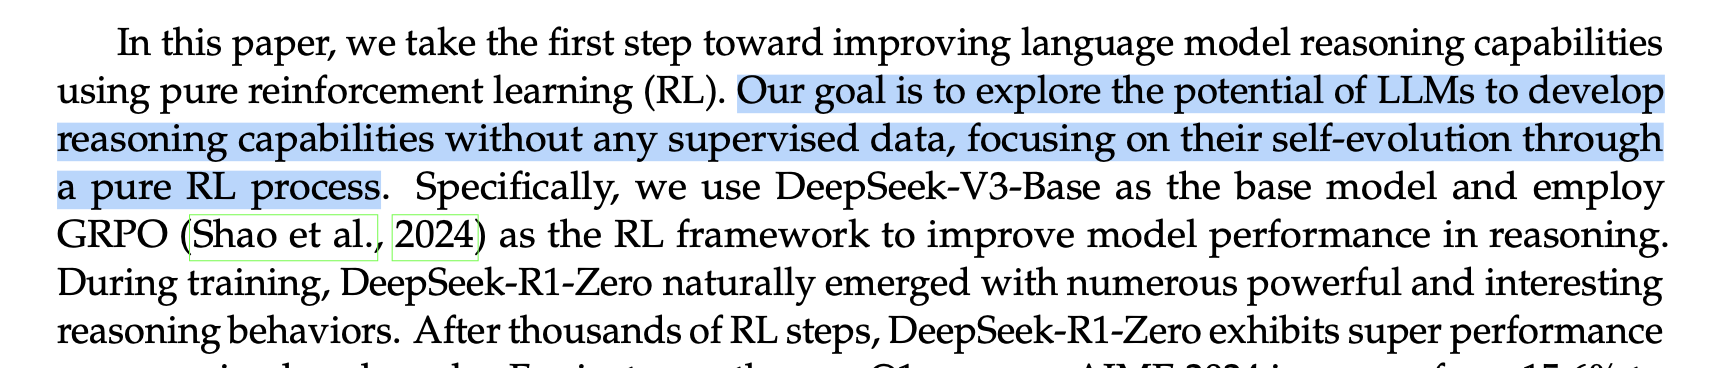

Quick Guide to DeepSeek models:
- DeepSeek-V3-Base = Pre-training
- DeepSeek-V3 = Supervised Fine Tuned
- DeepSeek-R1-Zero = RL Model
- DeepSeek-R1 = Improved RL Model


Then there are the distilled smaller models:

- DeepSeek-R1-Distill-Qwen-1.5B (smallest)
- DeepSeek-R1-Distill-Qwen-7B
- DeepSeek-R1-Distill-Llama-8B
- DeepSeek-R1-Distill-Qwen-14B
- DeepSeek-R1-Distill-Qwen-32B
- DeepSeek-R1-Distill-Llama-70B

*What are distilled models?*

# DeepSeek-R1-Zero

The prompt being used for DeepSeek-R1-Zero training:



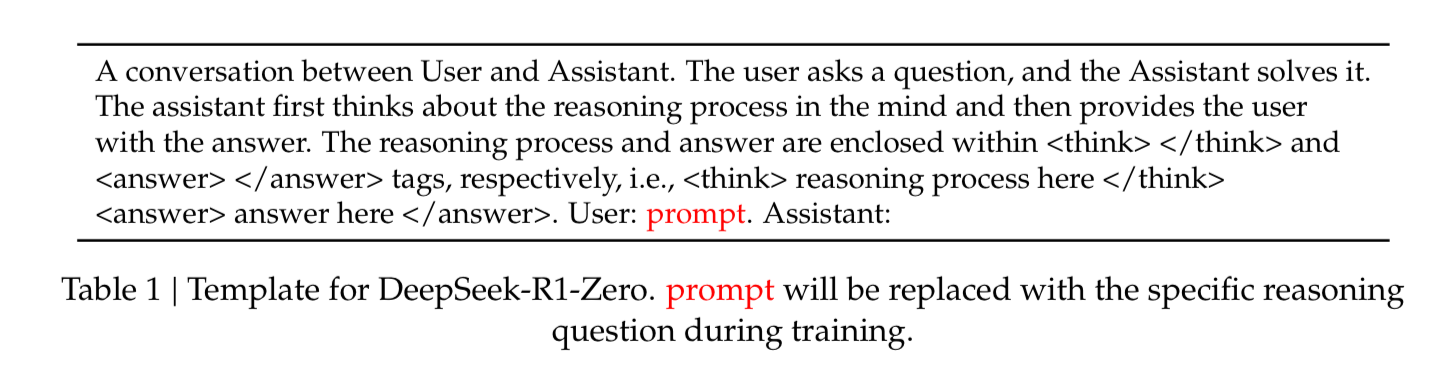

In DeepSeek-R1-Zero they have two types of deterministic rewards:

- Accuracy: is the response accurate? This could be deterministic for the cases of math and coding.
- Formatting: did we put some `<think>` and `</think>` tags and think before we spoke?

What is interesting is that there is no “neural reward model”. These are just deterministic rules that they use as signal.

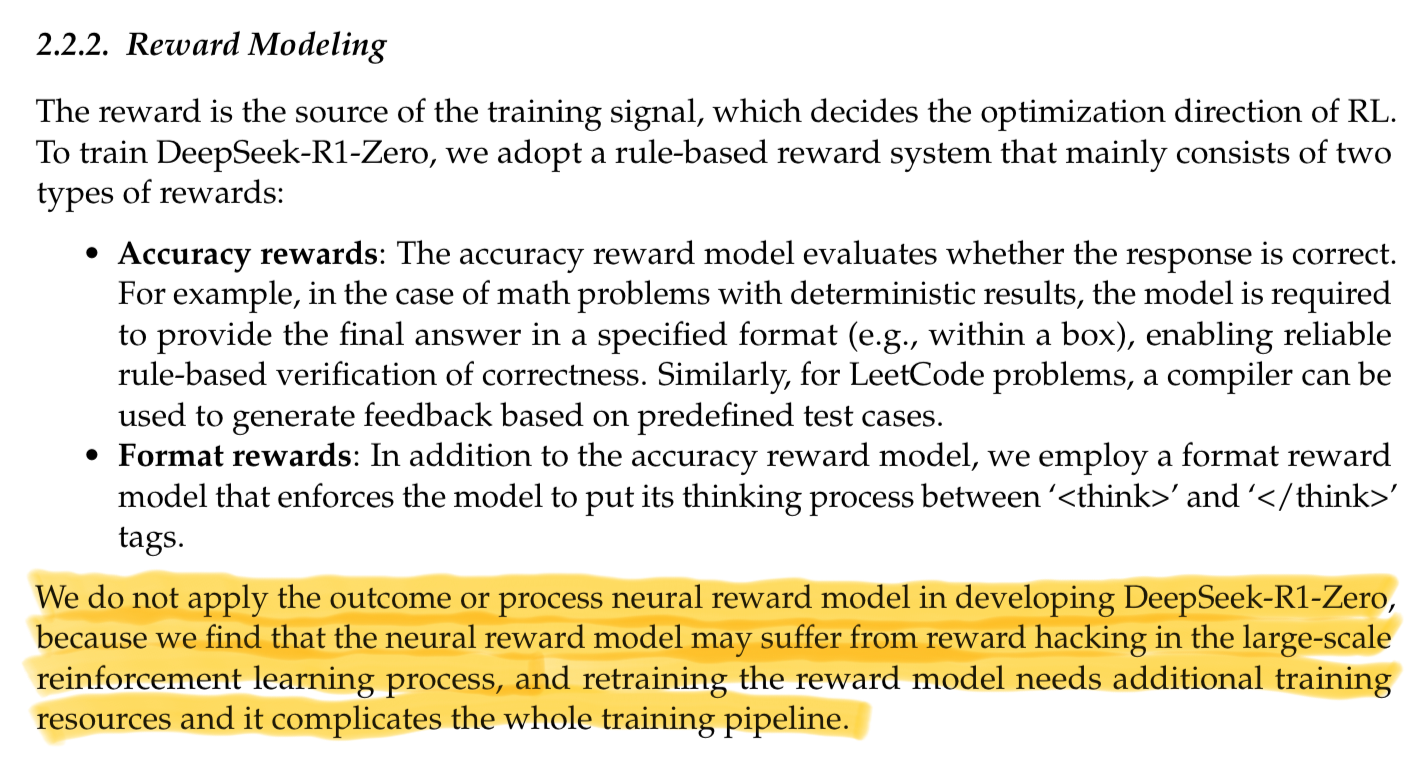

## Aha Moment

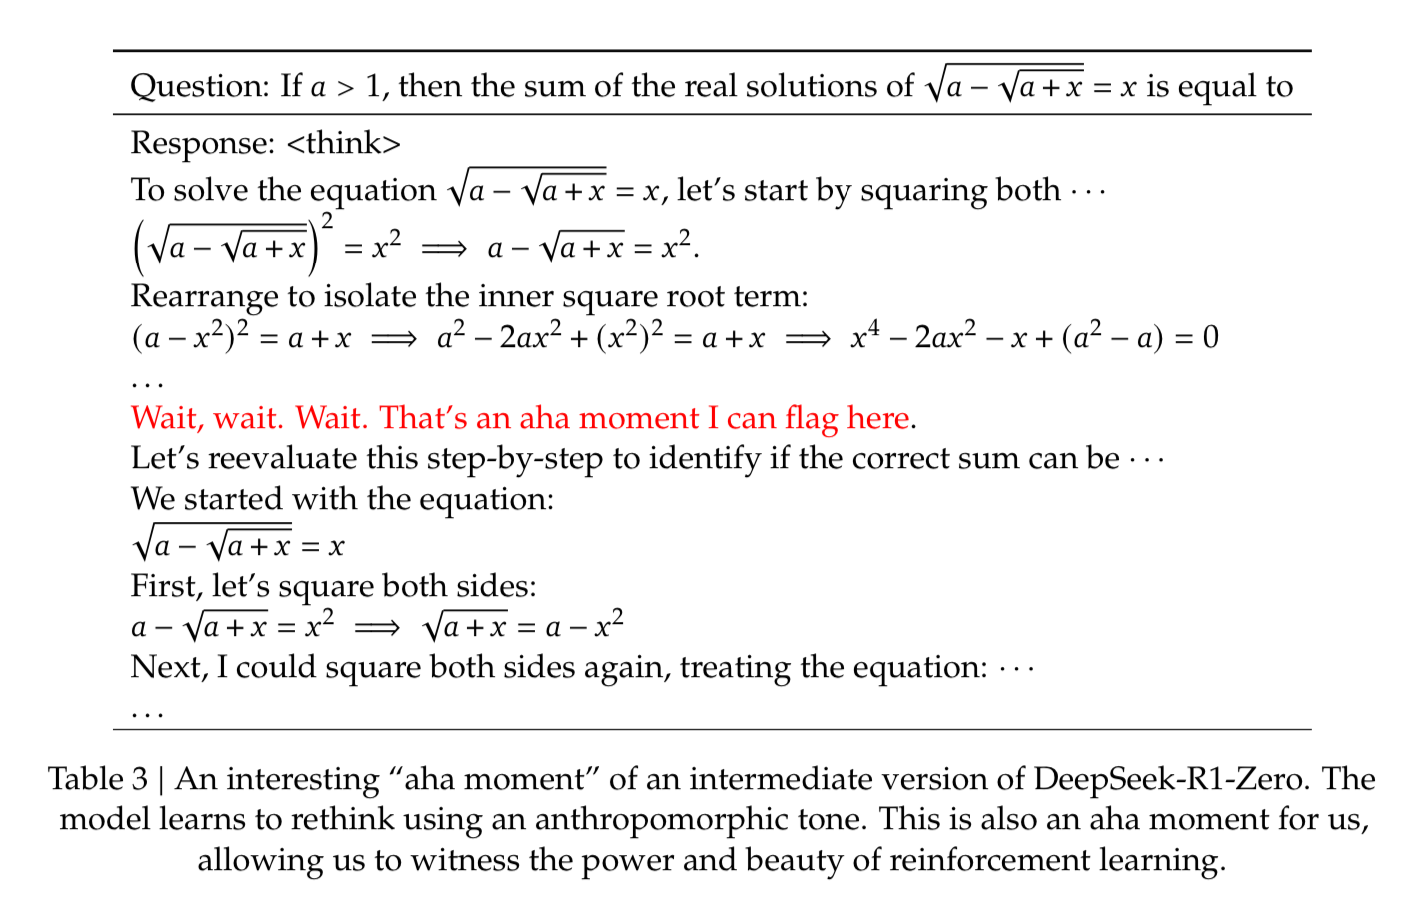

# Reasoning is a by-product!!

The more output words the model generates, the more likelihood of correcting/checking/validating/verifiying the thinking, and being more accurate.

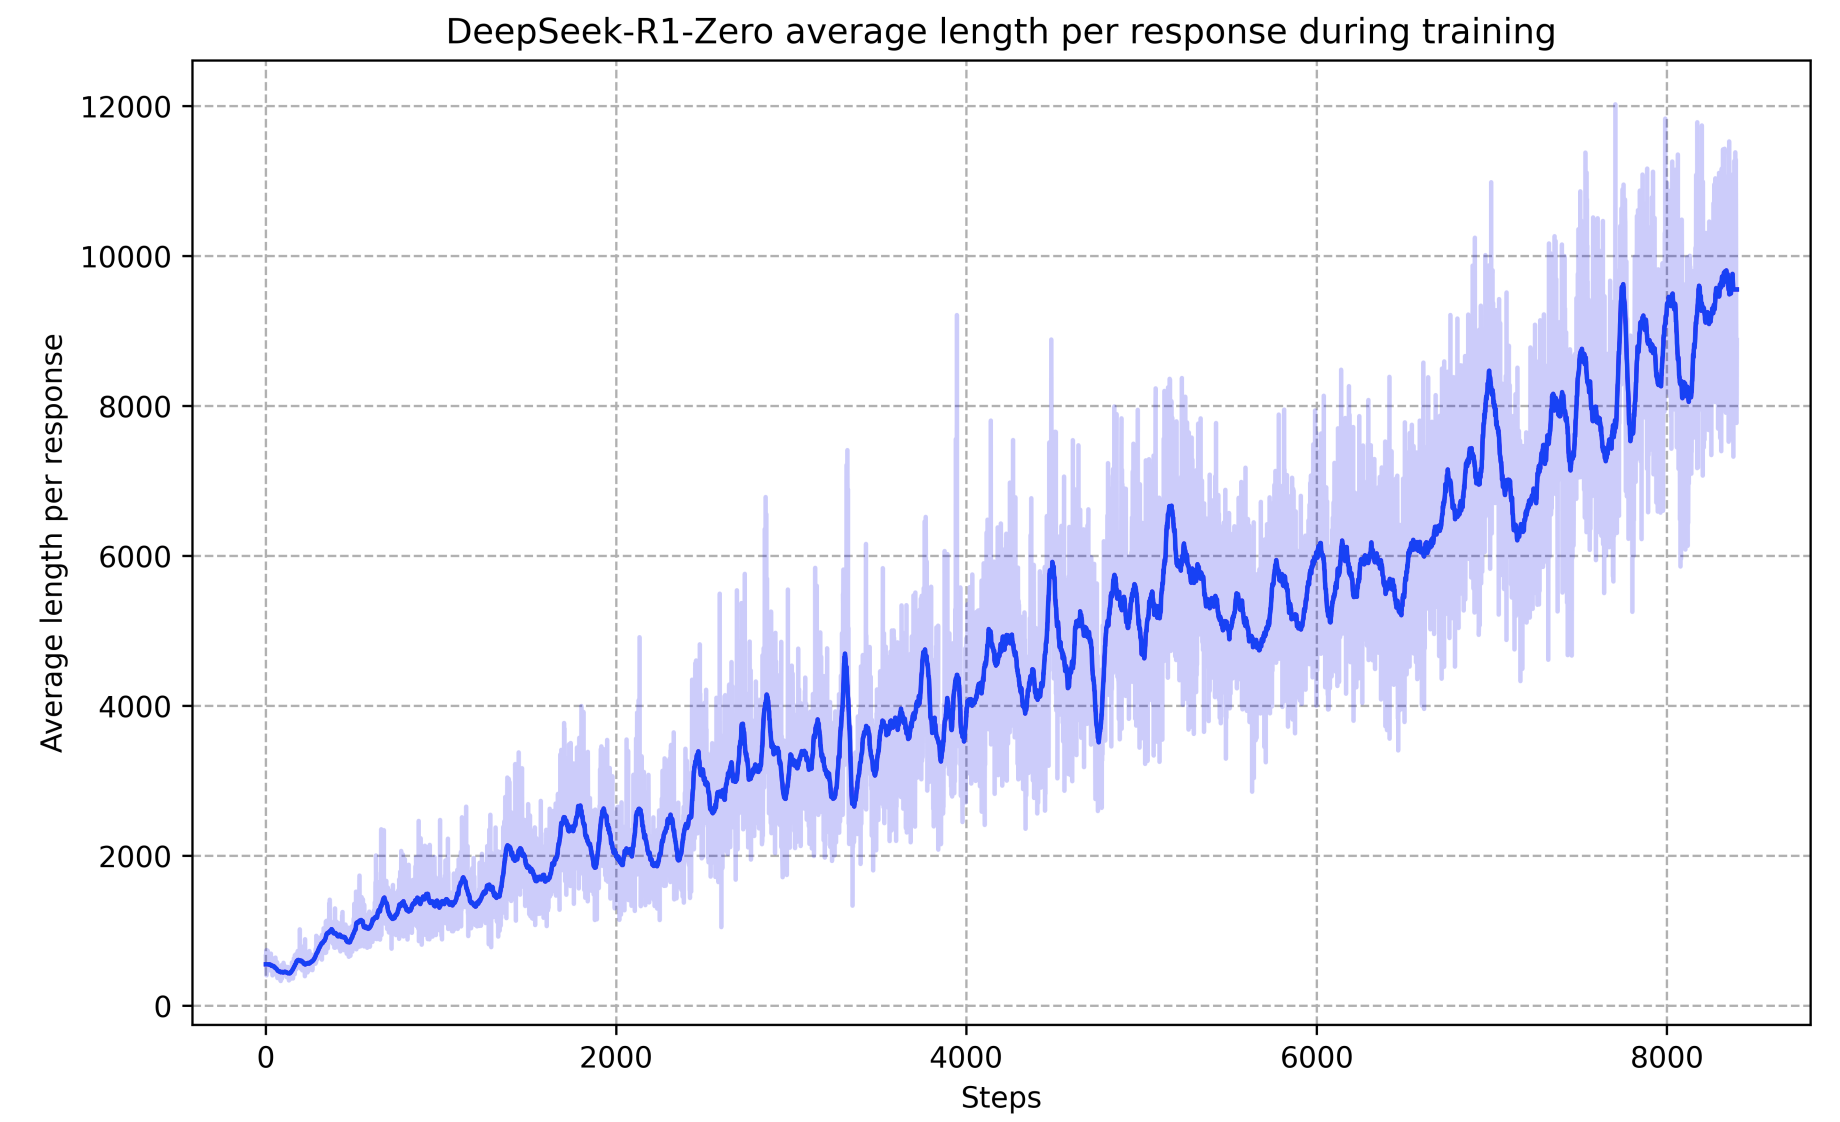

# KL-Divergence

The final piece of the equation is the KL Divergence term.

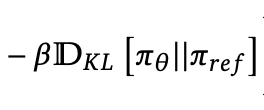

Without getting too deep into the math, this is why we have been keeping around a “reference model” during the training. The idea is that we do not want to drift too far from the original model. For each token, we want to make sure the new predictions do not drift too far from the original ones.

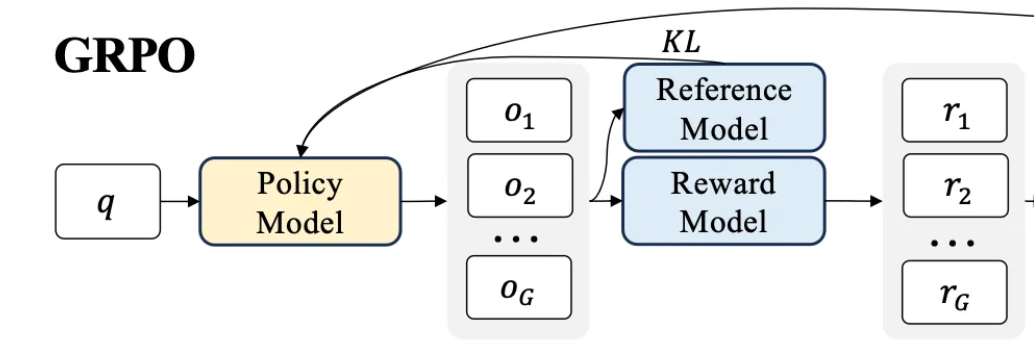

The intuition behind enforcing the KL Divergence is that the model we are starting with already knows how to write coherent sentences and follow instructions. We don’t want the new model to “reward hack” or exploit some sort of property in our reward signal that is not aligned with the original model. If it finds out that saying the word “pamplemousse” gets a high reward because it is a rarer word (and fun one to say) we don’t want it latching onto this behavior if it was not common in the pre-training.

# The Three Trainings

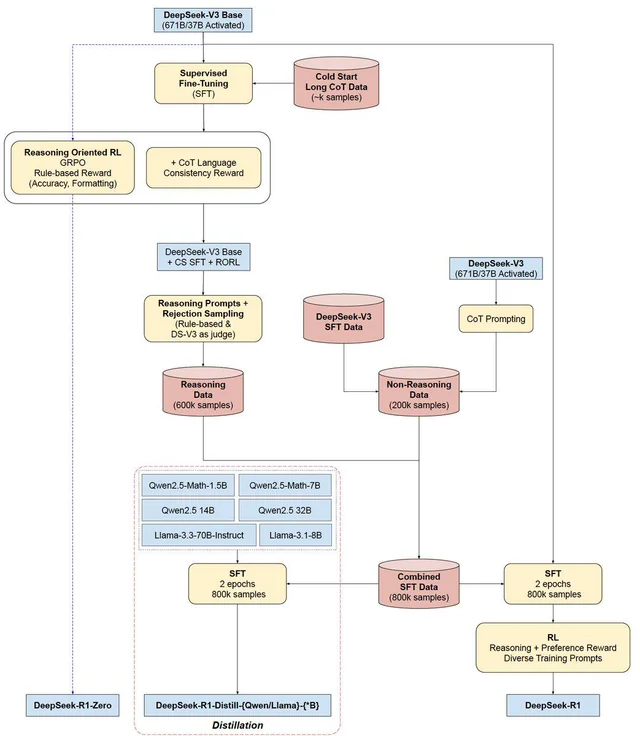

## First model: DeepSeek-R1-Zero

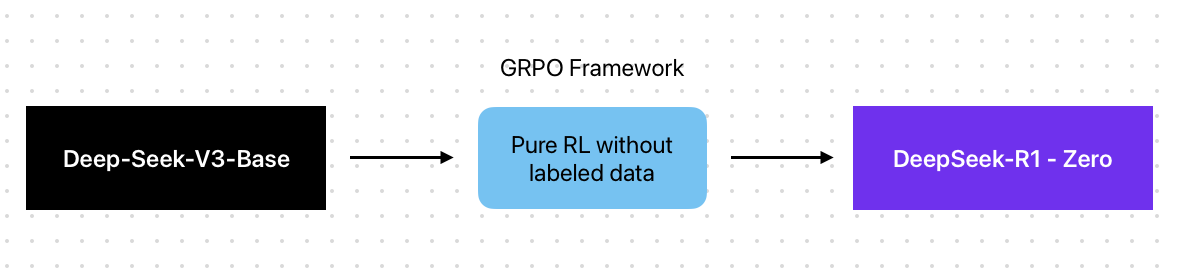

*Source: Vellum*

## Second Model: DeepSeek-R1

Poor readability and language mixing is something you’d expect from using pure-RL, without the structure or formatting provided by labeled data.

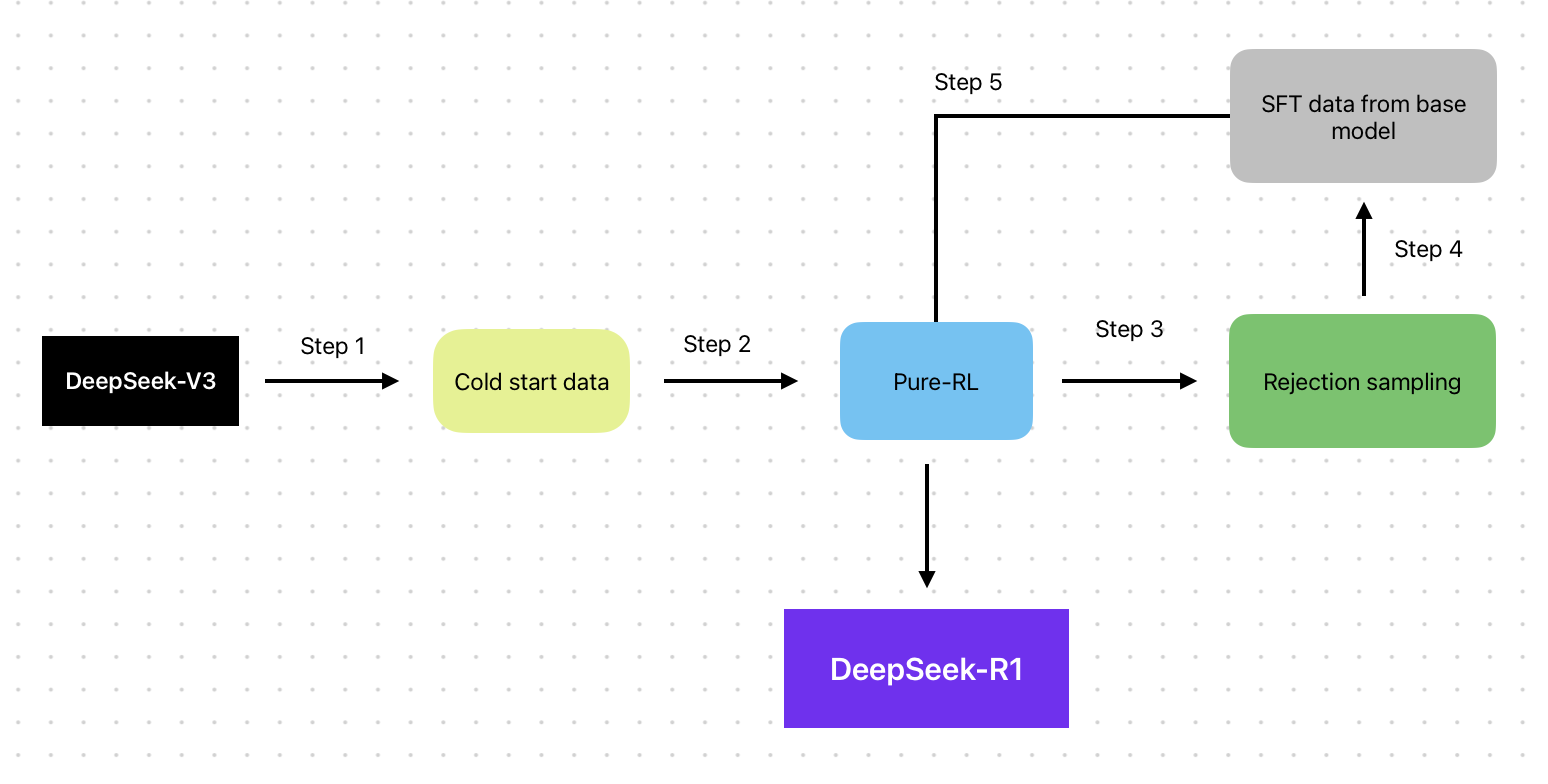

*Source: Vellum*

**Step 1: Initial Foundation (with Cold Start Data):** They started with the DeepSeek-V3 base model. To give it a strong initial capability, they fine-tuned it using a specific dataset called "cold start data." Think of this as giving the model a foundational understanding before more advanced training.

**Step 2: Learning Complex Skills (with Pure RL):** Next, they used a training technique called Pure Reinforcement Learning (RL). This method helps the model learn by trying things out and getting feedback, which is particularly effective for improving reasoning and problem-solving abilities.

**Step 3: Creating New, High-Quality Examples (via Rejection Sampling):** As the model trained with RL, it generated many responses. They then used a method called "rejection sampling" to automatically select only the best and most useful examples the model created during this phase. These selected examples become new, automatically generated training data (sometimes called synthetic data).

**Step 4: Combining the Best Knowledge:** These newly created, high-quality examples are then combined with the regular supervised training data that was used earlier to build the base DeepSeek-V3 model. This step is crucial to make sure the final model learns from both top-notch examples generated by the RL process and the broad knowledge from the initial training data.

**Step5: Final Model Refinement:** Using this combined dataset from Step 4, and potentially continuing with RL or a similar process based on the refined data, they completed the training. This final stage results in the more advanced DeepSeek-R1 model, which is better at a wider range of tasks and scenarios.

# Third Model: Distilled Models

**Model distillation** in machine learning (ML) is a technique used to transfer knowledge from a large, complex model (often called the teacher model) to a smaller, simpler model (called the student model).

The goal is to create a smaller model that retains much of the performance of the larger model while being more efficient in terms of computational resources, memory usage, and inference speed.

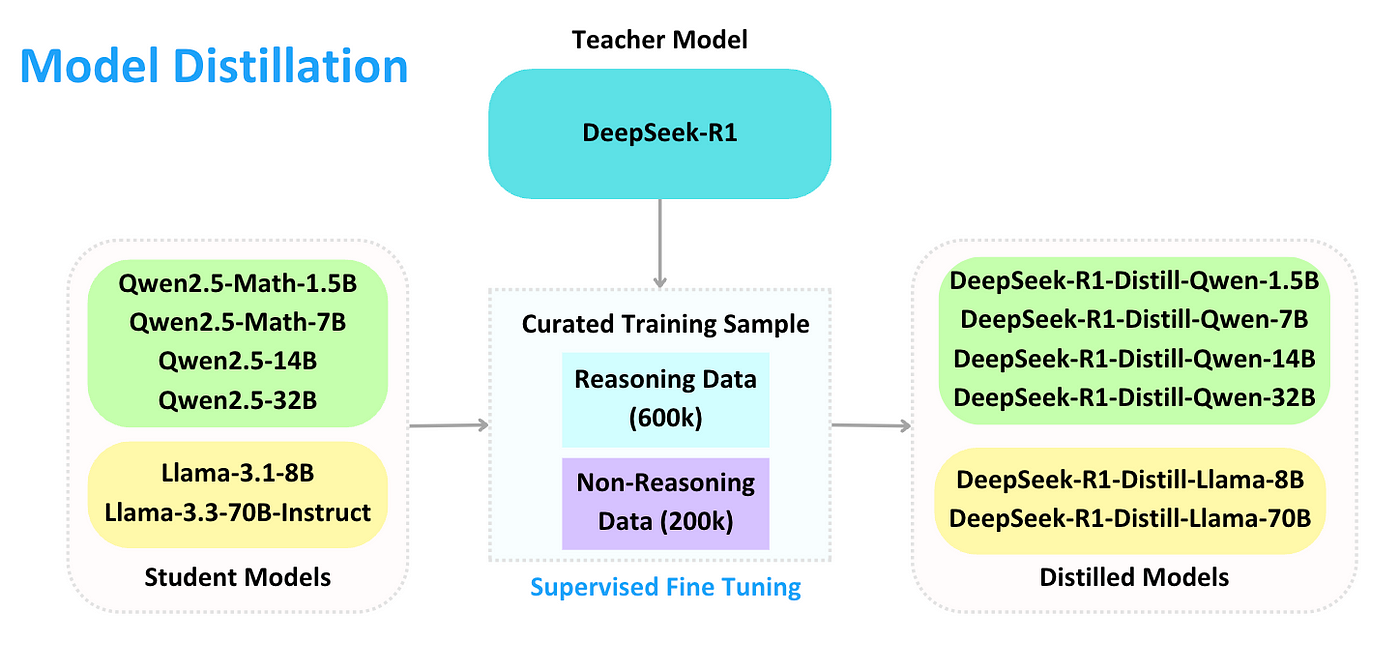

*Source: Annesylvia A*